# Vergleich der Heuristiken in Mutation und Rekombination

In [1]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm

# add folder to syspath to import ParticleSwarmOptimization
sys.path.insert(0, os.path.dirname(path)+'/ParticleSwarmOptimization')
 # add folder to syspath to import ACO 
sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35


# Small Problem

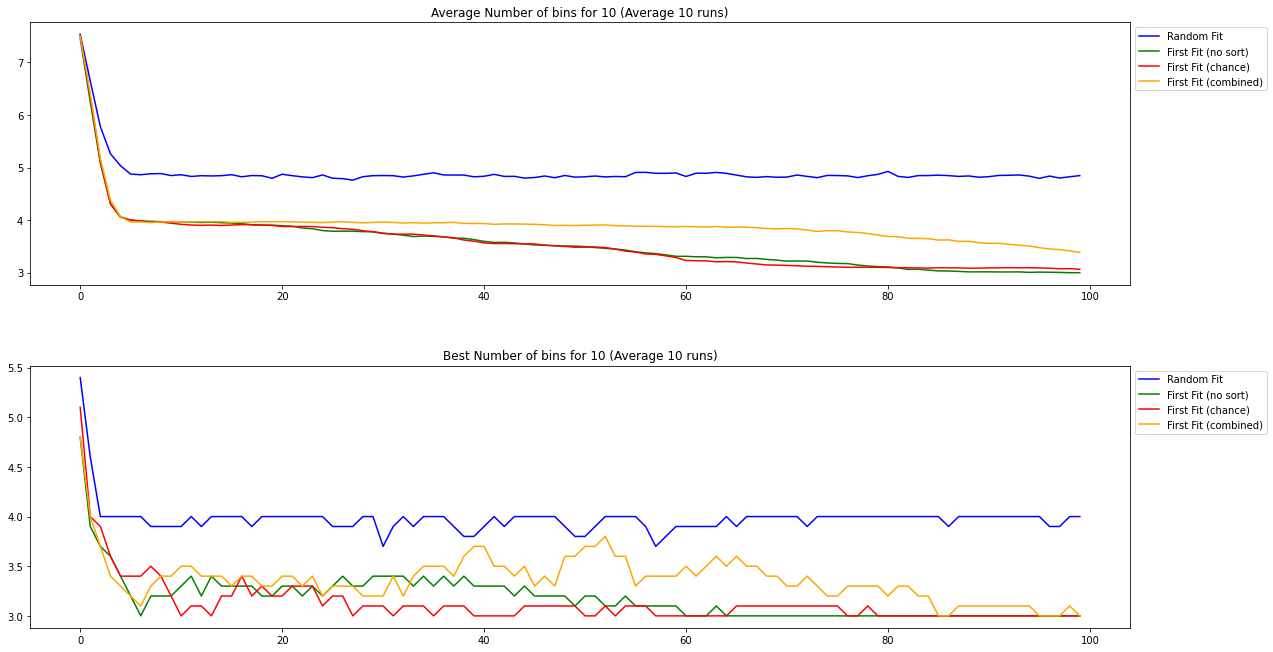

In [3]:
av_number = 10
number_generations = 100
pop_size = 80
crossover_prob = 0.8
mutation_prob = 0.05
fitness_function = 'amount_bins_pow'
objects = small_objects
container_vol= small_container[0]
container_weight= small_container[1]
amount_obj = len(small_objects)

average_vals_random = np.zeros((av_number, number_generations))
average_vals_first_no_sort = np.zeros((av_number, number_generations))
average_vals_first_combined = np.zeros((av_number, number_generations))
average_vals_first_chance = np.zeros((av_number, number_generations))
best_vals_random = np.zeros((av_number, number_generations))
best_vals_first_no_sort = np.zeros((av_number, number_generations))
best_vals_first_combined = np.zeros((av_number, number_generations))
best_vals_first_chance = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'random')
    _,_, average_vals_random[index], best_vals_random[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'no_sort')
    _,_, average_vals_first_no_sort[index], best_vals_first_no_sort[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'combined')
    _,_, average_vals_first_combined[index], best_vals_first_combined[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'chance')
    _,_, average_vals_first_chance[index], best_vals_first_chance[index],_,_ = GA.run()


# calc average
average_vals_random = np.average(average_vals_random, 0)
average_vals_first_no_sort = np.average(average_vals_first_no_sort, 0)
average_vals_first_combined = np.average(average_vals_first_combined, 0)
average_vals_first_chance = np.average(average_vals_first_chance, 0)
best_vals_random = np.average(best_vals_random, 0)
best_vals_first_no_sort = np.average(best_vals_first_no_sort, 0)
best_vals_first_combined = np.average(best_vals_first_combined, 0)
best_vals_first_chance = np.average(best_vals_first_chance, 0)


# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(h_pad=6)
ax[0].set_title(f'Average Number of bins for {amount_obj} (Average {av_number} runs)')
ax[0].plot(x_vals, average_vals_random, color="blue", label = 'Random Fit')
ax[0].plot(x_vals, average_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
ax[0].plot(x_vals, average_vals_first_chance, color="red", label = 'First Fit (chance)')
ax[0].plot(x_vals, average_vals_first_combined, color="orange", label = 'First Fit (combined)')
ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[1].set_title(f'Best Number of bins for {amount_obj} (Average {av_number} runs)')
ax[1].plot(x_vals, best_vals_random, color="blue", label = 'Random Fit')
ax[1].plot(x_vals, best_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
ax[1].plot(x_vals, best_vals_first_chance, color="red", label = 'First Fit (chance)')
ax[1].plot(x_vals, best_vals_first_combined, color="orange", label = 'First Fit (combined)')
ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

# Medium Problem

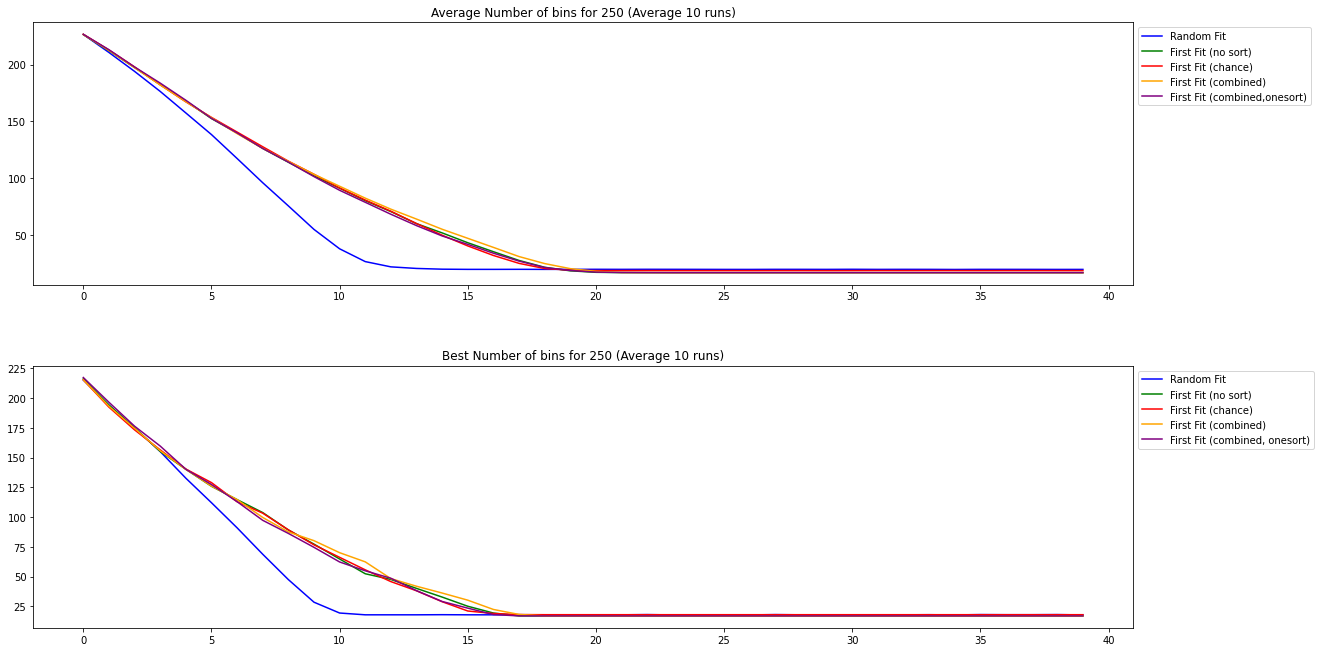

In [4]:
av_number = 10
number_generations = 40
pop_size = 50
crossover_prob = 0.8
mutation_prob = 0.05
fitness_function = 'amount_bins_pow'
objects = medium_objects
container_vol= medium_container[0]
container_weight= medium_container[1]
amount_obj = len(medium_objects)

average_vals_random = np.zeros((av_number, number_generations))
average_vals_first_no_sort = np.zeros((av_number, number_generations))
average_vals_first_combined = np.zeros((av_number, number_generations))
average_vals_first_chance = np.zeros((av_number, number_generations))
average_vals_first_combined_onesort = np.zeros((av_number, number_generations))
best_vals_random = np.zeros((av_number, number_generations))
best_vals_first_no_sort = np.zeros((av_number, number_generations))
best_vals_first_combined = np.zeros((av_number, number_generations))
best_vals_first_chance = np.zeros((av_number, number_generations))
best_vals_first_combined_onesort = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'random')
    _,_, average_vals_random[index], best_vals_random[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'no_sort')
    _,_, average_vals_first_no_sort[index], best_vals_first_no_sort[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'combined')
    _,_, average_vals_first_combined[index], best_vals_first_combined[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'chance')
    _,_, average_vals_first_chance[index], best_vals_first_chance[index],_,_ = GA.run()


# calc average
average_vals_random = np.average(average_vals_random, 0)
average_vals_first_no_sort = np.average(average_vals_first_no_sort, 0)
average_vals_first_combined = np.average(average_vals_first_combined, 0)
average_vals_first_chance = np.average(average_vals_first_chance, 0)
best_vals_random = np.average(best_vals_random, 0)
best_vals_first_no_sort = np.average(best_vals_first_no_sort, 0)
best_vals_first_combined = np.average(best_vals_first_combined, 0)
best_vals_first_chance = np.average(best_vals_first_chance, 0)


# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(h_pad=6)
ax[0].set_title(f'Average Number of bins for {amount_obj} (Average {av_number} runs)')
ax[0].plot(x_vals, average_vals_random, color="blue", label = 'Random Fit')
ax[0].plot(x_vals, average_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
ax[0].plot(x_vals, average_vals_first_chance, color="red", label = 'First Fit (chance)')
ax[0].plot(x_vals, average_vals_first_combined, color="orange", label = 'First Fit (combined)')
ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[1].set_title(f'Best Number of bins for {amount_obj} (Average {av_number} runs)')
ax[1].plot(x_vals, best_vals_random, color="blue", label = 'Random Fit')
ax[1].plot(x_vals, best_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
ax[1].plot(x_vals, best_vals_first_chance, color="red", label = 'First Fit (chance)')
ax[1].plot(x_vals, best_vals_first_combined, color="orange", label = 'First Fit (combined)')
ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

# Large Problem

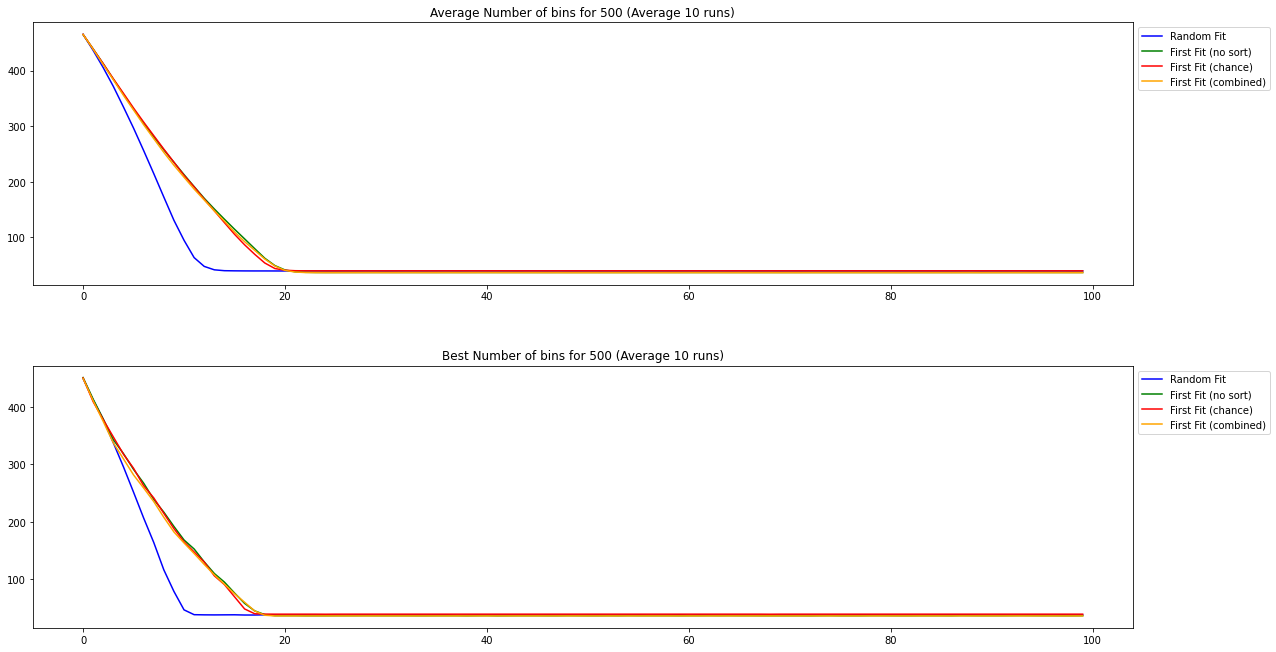

In [5]:
av_number = 10
number_generations = 100
pop_size = 80
crossover_prob = 0.8
mutation_prob = 0.05
fitness_function = 'amount_bins_pow'
objects = large_objects
container_vol= large_container[0]
container_weight= large_container[1]
amount_obj = len(large_objects)

average_vals_random = np.zeros((av_number, number_generations))
average_vals_first_no_sort = np.zeros((av_number, number_generations))
average_vals_first_combined = np.zeros((av_number, number_generations))
average_vals_first_chance = np.zeros((av_number, number_generations))
best_vals_random = np.zeros((av_number, number_generations))
best_vals_first_no_sort = np.zeros((av_number, number_generations))
best_vals_first_combined = np.zeros((av_number, number_generations))
best_vals_first_chance = np.zeros((av_number, number_generations))

for index in np.arange(av_number):
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'random')
    _,_, average_vals_random[index], best_vals_random[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'no_sort')
    _,_, average_vals_first_no_sort[index], best_vals_first_no_sort[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'combined')
    _,_, average_vals_first_combined[index], best_vals_first_combined[index],_,_ = GA.run()
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, number_generations, fitness_function, 'first_fit', fit_sort = 'chance')
    _,_, average_vals_first_chance[index], best_vals_first_chance[index],_,_ = GA.run()


# calc average
average_vals_random = np.average(average_vals_random, 0)
average_vals_first_no_sort = np.average(average_vals_first_no_sort, 0)
average_vals_first_combined = np.average(average_vals_first_combined, 0)
average_vals_first_chance = np.average(average_vals_first_chance, 0)
best_vals_random = np.average(best_vals_random, 0)
best_vals_first_no_sort = np.average(best_vals_first_no_sort, 0)
best_vals_first_combined = np.average(best_vals_first_combined, 0)
best_vals_first_chance = np.average(best_vals_first_chance, 0)


# Plot
x_vals = np.arange(number_generations)
# Punkte visualisieren
fig, ax = plt.subplots(2,figsize=(16,9))
fig.tight_layout(h_pad=6)
ax[0].set_title(f'Average Number of bins for {amount_obj} (Average {av_number} runs)')
ax[0].plot(x_vals, average_vals_random, color="blue", label = 'Random Fit')
ax[0].plot(x_vals, average_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
ax[0].plot(x_vals, average_vals_first_chance, color="red", label = 'First Fit (chance)')
ax[0].plot(x_vals, average_vals_first_combined, color="orange", label = 'First Fit (combined)')
ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[1].set_title(f'Best Number of bins for {amount_obj} (Average {av_number} runs)')
ax[1].plot(x_vals, best_vals_random, color="blue", label = 'Random Fit')
ax[1].plot(x_vals, best_vals_first_no_sort, color="green", label = 'First Fit (no sort)')
ax[1].plot(x_vals, best_vals_first_chance, color="red", label = 'First Fit (chance)')
ax[1].plot(x_vals, best_vals_first_combined, color="orange", label = 'First Fit (combined)')
ax[1].legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()